# Random Forest Classification

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from matplotlib import pyplot as plt


In [63]:
data= pd.read_csv('data/ml_class_df.csv',index_col=None)
item_data = data
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_done,item_id
0,furniture,acceptable,12685,48,24515,829,74,yes,1
1,other,like_new,12349,9,1855,77,9,yes,2
2,furniture,like_new,10317,24,22539,1560,0,no,3
3,kids,good,10409,73,13203,839,25,no,4
4,kitchen_utensils,acceptable,12045,79,11833,1183,70,yes,5


#### Features:

- item_category
- item_condition
- item_postcode
- item_available_timer in hours
- distance (item-user in meters)
- n_views
- n_likes
- item_done = y -> if the item was gone (this is what we’re trying to predict)

In [64]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         10000 non-null  object
 1   item_condition        10000 non-null  object
 2   item_postcode         10000 non-null  int64 
 3   item_available_timer  10000 non-null  int64 
 4   distance              10000 non-null  int64 
 5   n_views               10000 non-null  int64 
 6   n_likes               10000 non-null  int64 
 7   item_done             10000 non-null  object
 8   item_id               10000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 703.2+ KB


In [65]:
# item_data['item_postcode'] = item_data['item_postcode'].astype(str)

In [66]:
# saved_copy_item_data = item_data.copy()

In [67]:
# remove categorical data
# item_data_clean = item_data.drop('item_postcode', axis=1)


In [68]:
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_done,item_id
0,furniture,acceptable,12685,48,24515,829,74,yes,1
1,other,like_new,12349,9,1855,77,9,yes,2
2,furniture,like_new,10317,24,22539,1560,0,no,3
3,kids,good,10409,73,13203,839,25,no,4
4,kitchen_utensils,acceptable,12045,79,11833,1183,70,yes,5


In [69]:
item_data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_postcode,10000.0,12248.3940,1237.966872,10119.0,10825.00,12355.0,13353.00,14199.0
item_available_timer,10000.0,49.2005,28.734538,0.0,25.00,49.0,74.00,99.0
distance,10000.0,15953.7545,9252.485376,2.0,8008.00,15837.5,23996.25,31998.0
n_views,10000.0,997.1610,575.819424,0.0,503.00,994.5,1494.00,2000.0
n_likes,10000.0,94.2213,86.066738,0.0,22.75,69.0,145.00,379.0
item_id,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0


Text(0.5, 0, 'Frequency')

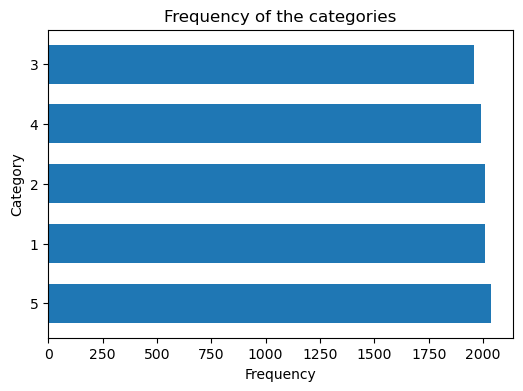

In [89]:
ax = item_data['item_category'].value_counts().plot(kind='barh', 
                                                   figsize=(6,4), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the categories")
ax.set_ylabel("Category")
ax.set_xlabel("Frequency") 

Text(0.5, 0, 'Frequency')

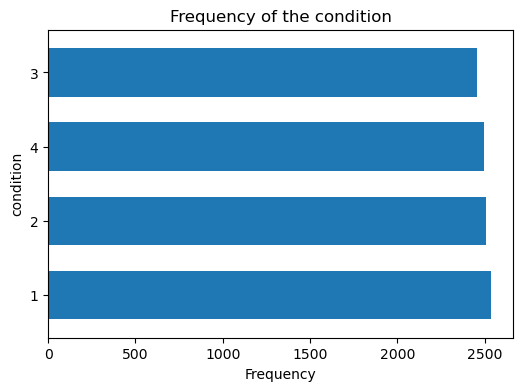

In [90]:
ax = item_data['item_condition'].value_counts().plot(kind='barh', 
                                                   figsize=(6,4), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the condition")
ax.set_ylabel("condition")
ax.set_xlabel("Frequency")

<Axes: >

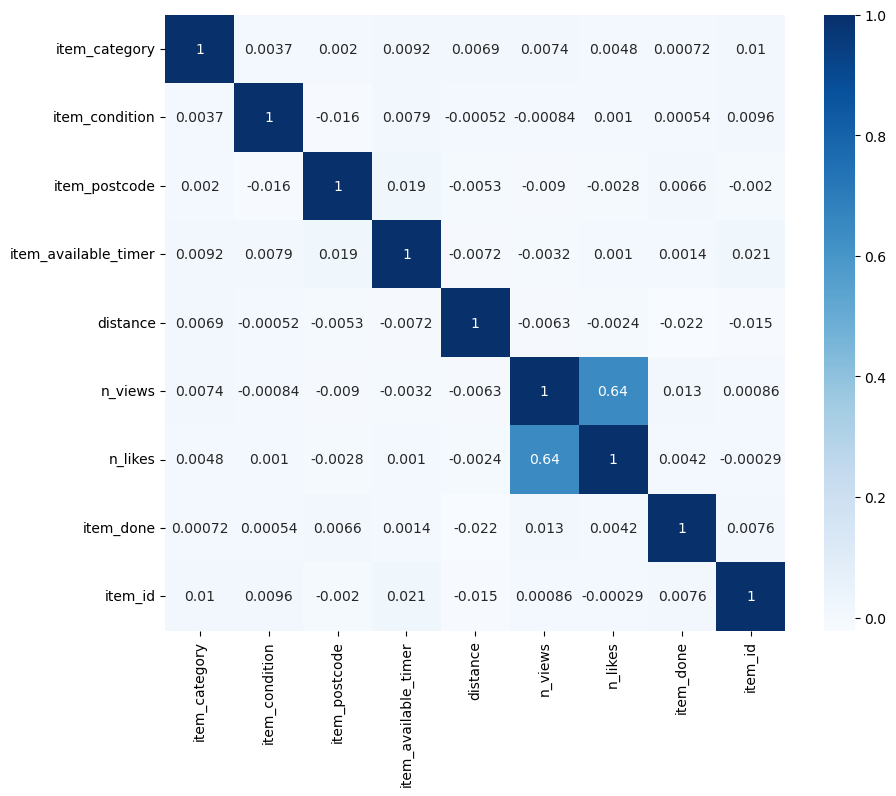

In [93]:
#correlations
corr = item_data.corr()
# corr.style.background_gradient(cmap='blues')

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, cmap="Blues", annot=True)

In [73]:
# g = sns.pairplot(item_data_clean, hue='item_done')
# g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by done_or_available", 
#                fontsize = 14, # defining the size of the title
#                y=1.05); # y = definig title y position (height)


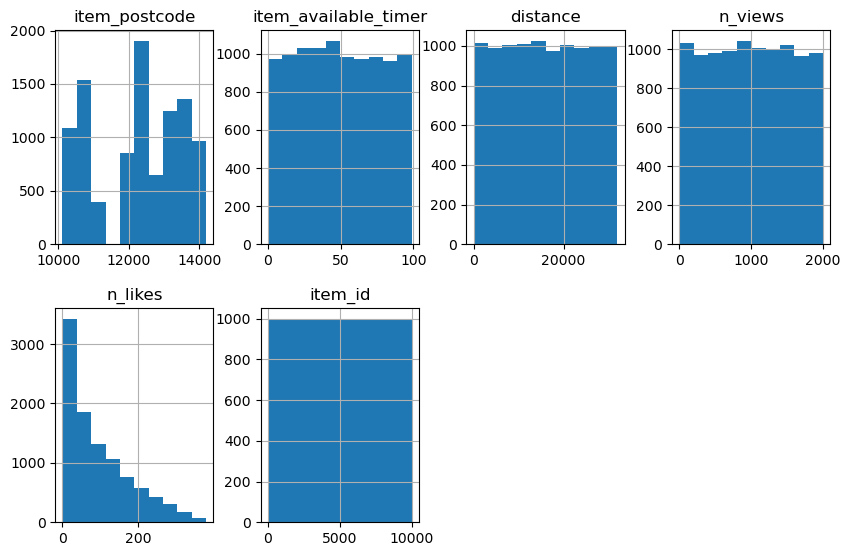

In [74]:
hist = item_data.hist(figsize=(10,10),layout=(3,4))

In [75]:
print(pd.unique(item_data['item_postcode']))
print(len(pd.unique(item_data['item_postcode'])))

[12685 12349 10317 10409 12045 10319 12055 13467 14057 12247 12351 14167
 12277 12489 13059 14059 13587 13405 10247 13189 12357 13357 10553 10589
 12347 13507 10405 12249 14052 14197 14129 12309 12051 10717 12487 13407
 13595 12209 12459 13351 10823 10245 10623 10711 13156 10318 13086 10967
 10625 12059 12621 13347 13439 12109 13159 13053 10785 12053 13409 12107
 13355 10369 12629 12279 13127 10555 12165 13581 13057 10365 10715 12047
 12439 12307 13353 10559 12623 10243 13051 10439 12167 10961 13627 12681
 12689 10713 14053 13088 12435 10551 12355 14165 10249 10787 12161 10179
 10997 10629 12101 12587 12057 10829 12157 14195 13437 10783 10585 12683
 12527 10777 12437 10789 12679 12159 10178 12619 10407 14055 13585 13597
 12103 13593 12305 12555 12559 10437 13129 13125 12205 13629 10435 14109
 10367 14199 10119 10627 14163 14089 12099 13583 12557 13089 12524 10587
 13469 10709 12526 10781 10315 13435 10999 10719 12049 12043 12105 10963
 13509 12163 12353 12589 13591 10557 12627 10707 13

## Preprocessing Data

In [76]:
# item_data['item_postcode'] = pd.to_numeric(item_data['item_postcode'])
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         10000 non-null  object
 1   item_condition        10000 non-null  object
 2   item_postcode         10000 non-null  int64 
 3   item_available_timer  10000 non-null  int64 
 4   distance              10000 non-null  int64 
 5   n_views               10000 non-null  int64 
 6   n_likes               10000 non-null  int64 
 7   item_done             10000 non-null  object
 8   item_id               10000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 703.2+ KB


In [77]:
# postcode_pop_original= pd.read_csv('data/postalcode_pop.csv',index_col=None)
# postcode_pop = postcode_pop_original
# postcode_pop.head()

In [78]:

# postcode_pop['population'] = postcode_pop['population'].str.replace(',' , '').replace('—', '').replace('—', '')


In [79]:
# # postcode_pop.info()

# postcode_pop['population'] = pd.to_numeric(postcode_pop['population'])

# postcode_pop = postcode_pop.dropna()
# len(postcode_pop)

In [80]:
# postcode_pop.isna().sum()

In [81]:
# from sklearn.preprocessing import MinMaxScaler

  
# # copy the data
# postcode_pop_sklearn = postcode_pop.copy()
  
# # apply normalization techniques
# column = 'pop'
# postcode_pop_sklearn['population'] = MinMaxScaler().fit_transform(np.array(postcode_pop_sklearn['population']).reshape(-1,1))
  
# # view normalized data  
# display(postcode_pop_sklearn)

In [82]:
item_data['item_done'].unique()

array(['yes', 'no'], dtype=object)

In [83]:
# encoding

item_data['item_done'] = item_data['item_done'].replace('no', 0).replace('yes', 1)
item_data['item_category'] = item_data['item_category'].replace('furniture', 1).replace('clothes', 2).replace('kitchen_utensils', 3).replace('kids', 4).replace('other', 5)

item_data['item_condition'] = item_data['item_condition'].replace('like_new', 1).replace('good', 2).replace('acceptable', 3).replace('poor', 4)

item_data.head()



,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_done,item_id
0,1,3,12685,48,24515,829,74,1,1
1,5,1,12349,9,1855,77,9,1,2
2,1,1,10317,24,22539,1560,0,0,3
3,4,2,10409,73,13203,839,25,0,4
4,3,3,12045,79,11833,1183,70,1,5


## Splitting the Data

In [84]:
# Split the data into features (X) and target (y)
X = item_data.drop(['item_done'], axis=1)
y = item_data['item_done']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
# from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [86]:
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [87]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


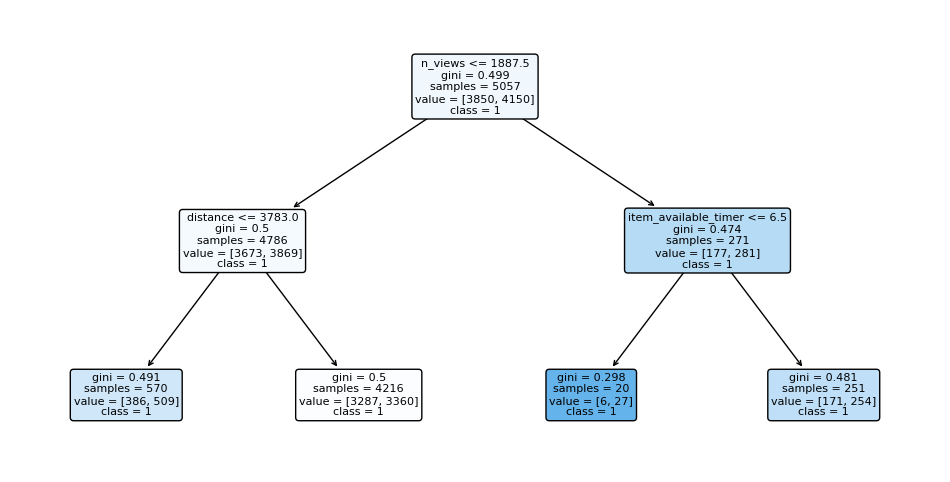

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


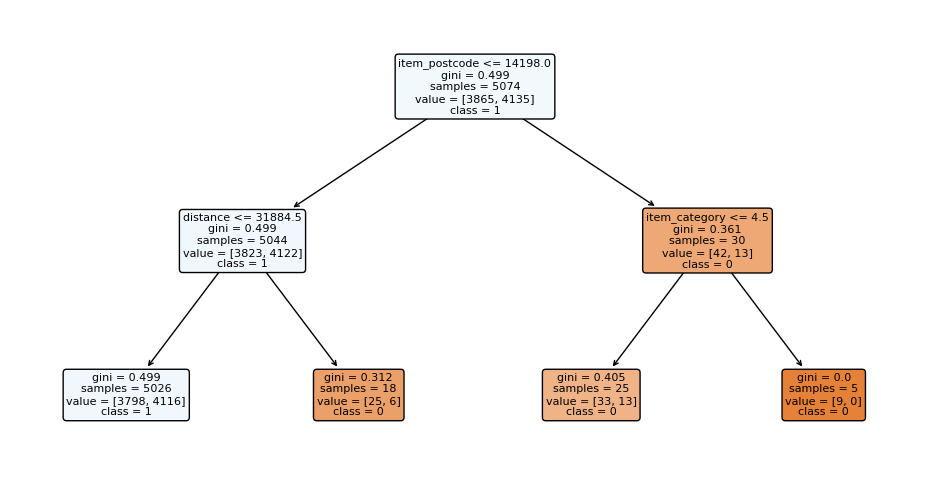

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


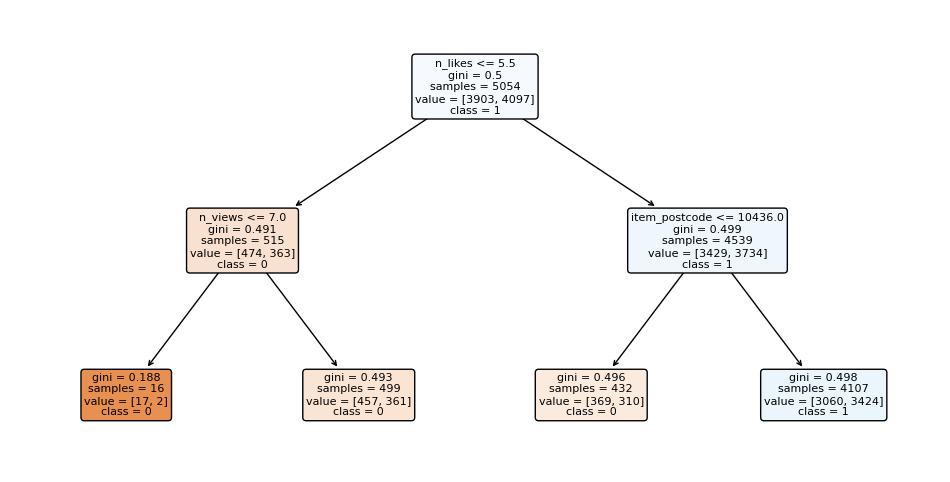

In [88]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['no', 'yes']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5025
Mean Squared Error: 0.5025
Root Mean Squared Error: 0.7088723439378912


Sugestion to improve the mock dataset
Webscrape
- [Facebook group freeyourstuffberlin](https://www.facebook.com/groups/freeyourstuff/members)
- [website freeyourstuffberlin](https://www.free-your-stuff.com/de/berlin)
- [demografic statistics](https://postal-codes.cybo.com/germany/berlin/)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

tps://postal-codes.cybo.com/germany/berlin/